<a href="https://colab.research.google.com/github/brunacorreiade/pythonzinho/blob/main/programaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparação

In [ ]:
# conexta o google colab ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importa as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
# carrega os dados
dados = pd.read_excel("/content/drive/MyDrive/programaria_python/entre_astronautas_python.xlsx")

In [ ]:
# quantidade de linhas e colunas
dados.shape

(5293, 36)

In [ ]:
# informações sobre a tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 36 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   ID                                                                          5293 non-null   object
 1   Idade                                                                       5293 non-null   int64 
 2   Faixa etária                                                                5293 non-null   object
 3   Gênero                                                                      5293 non-null   object
 4   Cor, raça ou etnia                                                          5293 non-null   object
 5   PCD                                                                         5293 non-null   object
 6   Experiência profissional prejudicada                    

In [ ]:
# nomes das colunas
dados.columns

Index(['ID', 'Idade', 'Faixa etária', 'Gênero', 'Cor, raça ou etnia', 'PCD',
       'Experiência profissional prejudicada', 'Prejudica?', 'Vive no Brasil',
       'Estado onde mora', 'UF', 'Região onde mora', 'Mudou de estado',
       'Estado de origem', 'Nível de ensino', 'Área de formação',
       'Computação?', 'É gestor?', 'Cargo como gestor', 'Cargo atual', 'Nível',
       'Novo nível', 'Faixa salarial', 'Tempo de experiência em dados',
       'Você participou de entrevistas de emprego nos últimos 6 meses?',
       'Você pretende mudar de emprego nos próximos 6 meses?',
       'Modelo de trabalho atual', 'É remoto?',
       'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?',
       'Aceita presencial?', 'Atuação', 'Linguagem preferida',
       'Cloud preferida', 'Ferramenta de BI preferida',
       'Utiliza IA no trabalho?', 'Utiliza?'],
      dtype='object')

## Coluna de salários

In [ ]:
# lista com valores únicos da faixa salarial
list(dados["Faixa salarial"].unique())

['de R$ 12.001/mês a R$ 16.000/mês',
 'de R$ 6.001/mês a R$ 8.000/mês',
 nan,
 'de R$ 4.001/mês a R$ 6.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 20.001/mês a R$ 25.000/mês',
 'de R$ 1.001/mês a R$ 2.000/mês',
 'de R$ 3.001/mês a R$ 4.000/mês',
 'de R$ 16.001/mês a R$ 20.000/mês',
 'de R$ 2.001/mês a R$ 3.000/mês',
 'Acima de R$ 40.001/mês',
 'de R$ 25.001/mês a R$ 30.000/mês',
 'Menos de R$ 1.000/mês',
 'de R$ 30.001/mês a R$ 40.000/mês']

In [ ]:
# substitui valores nulos por "não informado"
dados["Faixa salarial"].fillna("Não informado", inplace=True)

In [ ]:
# dicionário que relaciona as faixas salariais com valores inteiros
faixa_salarial_para_salario = {
  "Menos de R$ 1.000/mês": (1, 1000),
  "de R$ 1.001/mês a R$ 2.000/mês": (1001, 2000),
  "de R$ 2.001/mês a R$ 3.000/mês": (2001, 3000),
  "de R$ 3.001/mês a R$ 4.000/mês": (3001, 4000),
  "de R$ 4.001/mês a R$ 6.000/mês": (4001, 6000),
  "de R$ 6.001/mês a R$ 8.000/mês": (6001, 8000),
  "de R$ 8.001/mês a R$ 12.000/mês": (8001, 12000),
  "de R$ 12.001/mês a R$ 16.000/mês": (12001, 16000),
  "de R$ 16.001/mês a R$ 20.000/mês": (16001, 20000),
  "de R$ 20.001/mês a R$ 25.000/mês": (20001, 25000),
  "de R$ 25.001/mês a R$ 30.000/mês": (25001, 30000),
  "de R$ 30.001/mês a R$ 40.000/mês": (30001, 40000),
  "Acima de R$ 40.001/mês": (40001, 100000),
  "Não informado": (0, 0)
}

In [ ]:
# função para gerar salários aleatórios dentro das faixas
def gerar_salario(faixa):
  minimo, maximo = faixa_salarial_para_salario[faixa]
  if minimo == maximo:
    return minimo
  else:
    return int(np.random.randint(minimo, maximo))

In [ ]:
# cria a coluna de salário, aplicando a função nela
dados["Salário"] = dados["Faixa salarial"].apply(gerar_salario)

In [ ]:
# descreve os dados numéricos da tabela
dados.describe()

,Idade,Salário
count,5293.000000,5293.000000
mean,31.997166,9765.104855
std,7.623498,10284.954186
min,18.000000,0.000000
25%,27.000000,3722.000000
50%,30.000000,7533.000000
75%,36.000000,12909.000000
max,73.000000,98768.000000


In [ ]:
# tipos de dados das colunas
dados.dtypes

,0
ID,object
Idade,int64
Faixa etária,object
Gênero,object
"Cor, raça ou etnia",object
PCD,object
Experiência profissional prejudicada,object
Prejudica?,object
Vive no Brasil,object
Estado onde mora,object


## Primeira análise

O len faz com que o filtro mostre apenas a quantidade ao invés de uma amostra dos dados

In [ ]:
# pessoas do sexo feminino
len(dados[dados["Gênero"] == "Feminino"])

1293

In [ ]:
# pessoas com 40 anos ou mais
len(dados[dados["Idade"] >= 40])

801

In [ ]:
# pessoas do sexo feminino com 40 anos ou mais
len(dados[(dados["Gênero"] == "Feminino") & (dados["Idade"] >= 40)])

186

In [ ]:
# pessoas não brancas
len(dados[dados["Cor, raça ou etnia"].isin(["Parda", "Preta", "Amarela", "Indígena"])])

1827

In [ ]:
# pessoas do sexo feminino com 40 anos ou mais e não brancas
len(dados[(dados["Gênero"] == "Feminino") & (dados["Idade"] >= 40) & (dados["Cor, raça ou etnia"].isin(["Parda", "Preta", "Amarela", "Indígena"]))])

59

In [ ]:
# pessoas do sexo feminino com 40 anos ou mais e não brancas por nível profissional
dados[(dados["Gênero"] == "Feminino") & (dados["Idade"] >= 40) & (dados["Cor, raça ou etnia"].isin(["Parda", "Preta", "Amarela", "Indígena"]))]["Novo nível"].value_counts()

,count
Novo nível,
Sênior,17
Gestor,10
Júnior,8
Pleno,7


In [ ]:
# cria uma tabela dinâmica com pessoas gestoras por sexo
pd.pivot_table(dados, values="ID", index="Gênero", columns="É gestor?", aggfunc="count")

É gestor?,Não,Sim
Gênero,,
Feminino,943.0,168.0
Masculino,2896.0,726.0
Outro,7.0,NaN
Prefiro não informar,11.0,2.0


In [ ]:
# cria uma tabela dinâmica com pessoas gestoras por etnia
pd.pivot_table(dados, values="ID", index="Cor, raça ou etnia", columns="É gestor?", aggfunc="count")

É gestor?,Não,Sim
"Cor, raça ou etnia",,
Amarela,104,29
Branca,2466,625
Indígena,9,2
Outra,9,6
Parda,959,175
Prefiro não informar,29,2
Preta,281,57


## Estatística básica

In [ ]:
# calcula média, mediana, desvio padrão, mínimo e máximo para idade e salário
dados[["Idade", "Salário"]].agg(["mean", "median", "std", "min", "max"])

,Idade,Salário
mean,31.997166,9765.104855
median,30.000000,7533.000000
std,7.623498,10284.954186
min,18.000000,0.000000
max,73.000000,98768.000000


In [ ]:
# calcula a moda para idade
dados["Idade"].mode()

,Idade
0,27


In [ ]:
# agrupa gênero pela média de idade
dados.groupby("Gênero")["Idade"].mean()

,Idade
Gênero,
Feminino,32.033256
Masculino,31.985409
Outro,26.555556
Prefiro não informar,35.062500


In [ ]:
# agrupa gênero pela média salarial
dados.groupby("Gênero")["Salário"].mean()

,Salário
Gênero,
Feminino,7886.805104
Masculino,10377.075975
Outro,4546.000000
Prefiro não informar,12454.375000


## Valores faltantes

### Cargos

In [ ]:
# conta valores únicos por cargo (exibindo nulos)
dados["Cargo atual"].value_counts(dropna=False)

,count
Cargo atual,
NaN,1436
Analista de Dados/Data Analyst,907
Cientista de Dados/Data Scientist,687
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect,684
Analista de BI/BI Analyst,506
Outra Opção,262
Analista de Negócios/Business Analyst,195
Analytics Engineer,139
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas,105


In [ ]:
# substitui nulos por notação de "não consta na lista"
dados["Cargo atual"].fillna("Não consta na lista/Desempregado", inplace=True)

# iguala outras opções de cargo a mesma notação dos nulos
dados["Cargo atual"].replace("Outra Opção", "Não consta na lista/Desempregado", inplace=True)

In [ ]:
# exibe o resultado
dados["Cargo atual"].value_counts(dropna=False)

,count
Cargo atual,
Não consta na lista/Desempregado,1698
Analista de Dados/Data Analyst,907
Cientista de Dados/Data Scientist,687
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect,684
Analista de BI/BI Analyst,506
Analista de Negócios/Business Analyst,195
Analytics Engineer,139
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas,105
Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO),81


### Estado/UF

Os estados/ufs nulos são de pessoas que não moram no Brasil.  
O "ZZZ" é uma sigla para país estrangeiro não identificado.

In [ ]:
# conta valores únicos por estado (exibindo nulos)
dados["Estado onde mora"].value_counts(dropna=False)

,count
Estado onde mora,
São Paulo (SP),2073
Minas Gerais (MG),557
Rio de Janeiro (RJ),437
Paraná (PR),420
Rio Grande do Sul (RS),291
Santa Catarina (SC),250
Distrito Federal (DF),175
Bahia (BA),155
Ceará (CE),134


In [ ]:
# substitui nulos por "não definido"
dados["Estado onde mora"].fillna("Não Definido (ZZZ)", inplace=True)

In [ ]:
# conta valores únicos por uf (exibindo nulos)
dados["UF"].value_counts(dropna=False)

,count
UF,
SP,2073
MG,557
RJ,437
PR,420
RS,291
SC,250
DF,175
BA,155
CE,134


In [ ]:
# substitui nulos por "zzz"
dados["UF"].fillna("ZZZ", inplace=True)

## Valores discrepantes

{'whiskers': [<matplotlib.lines.Line2D at 0x7ac98facc400>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac98facc940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac98fa7ef80>],
 'medians': [<matplotlib.lines.Line2D at 0x7ac98facce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ac98facd120>],
 'means': []}

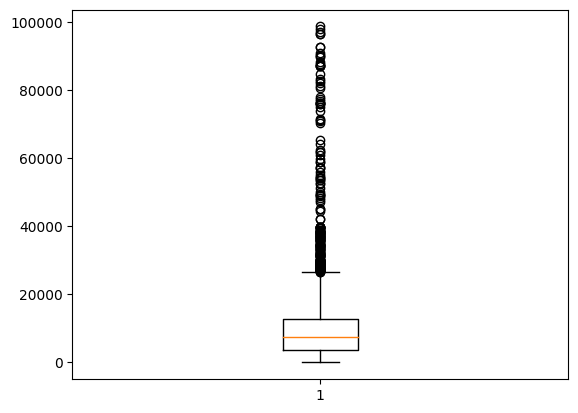

In [ ]:
# plota o gráfico de salários
plt.boxplot(dados["Salário"])

In [ ]:
# conta os valores por faixa salarial
dados["Faixa salarial"].value_counts()

,count
Faixa salarial,
de R$ 8.001/mês a R$ 12.000/mês,1026
de R$ 4.001/mês a R$ 6.000/mês,745
de R$ 12.001/mês a R$ 16.000/mês,650
de R$ 6.001/mês a R$ 8.000/mês,637
Não informado,540
de R$ 3.001/mês a R$ 4.000/mês,352
de R$ 16.001/mês a R$ 20.000/mês,328
de R$ 2.001/mês a R$ 3.000/mês,288
de R$ 1.001/mês a R$ 2.000/mês,216


In [ ]:
media_salario = dados["Salário"].mean()
media_salario

9765.104855469488

In [ ]:
desvio_salario = dados["Salário"].std()
desvio_salario

10284.954186391711

In [ ]:
limite_superior = media_salario + 3 * desvio_salario
limite_superior

40619.96741464462

In [ ]:
limite_inferior = media_salario - 3 * desvio_salario
limite_inferior

-21089.757703705647

In [ ]:
# exibe a faixa salarial dos salários acima do limite superior
dados[dados["Salário"] > limite_superior]["Faixa salarial"].value_counts()

,count
Faixa salarial,
Acima de R$ 40.001/mês,72


In [ ]:
# calcula a média da faixa salarial que está acima do limite superior e do salário que está abaixo do limite superior
media_acima_40 = dados[(dados["Faixa salarial"] == "Acima de R$ 40.001/mês") & (dados["Salário"] < limite_superior)]["Salário"].mean()
media_acima_40

nan

In [ ]:
# aplica a média calculada nos salários acima do limite superior
dados.loc[(dados["Faixa salarial"] == "Acima de R$ 40.001/mês") & (dados["Salário"] > limite_superior), "Salário"] = media_acima_40

{'whiskers': [<matplotlib.lines.Line2D at 0x7ac98f5738b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac98f573df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac98f573610>],
 'medians': [<matplotlib.lines.Line2D at 0x7ac98f608370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ac98f608610>],
 'means': []}

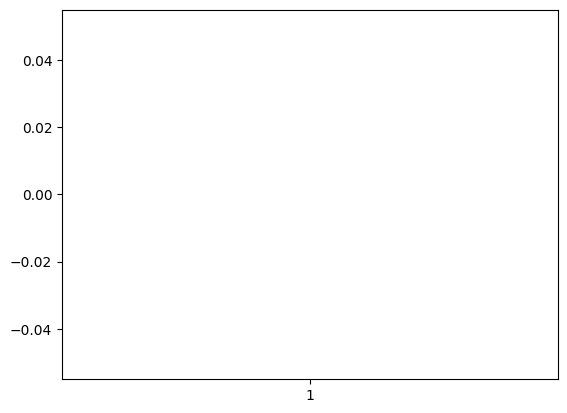

In [ ]:
plt.boxplot(dados["Salário"])

## Intervalo de confiança

In [ ]:
# armazena o agrupamento de sexo
generos = dados.groupby("Gênero")

In [ ]:
# calcula a média salarial por sexo
media_amostral = generos["Salário"].mean()
media_amostral

,Salário
Gênero,
Feminino,7417.985959
Masculino,9453.394125
Outro,4546.000000
Prefiro não informar,10134.133333


In [ ]:
# calcula o desvio padrão por sexo
desvio_amostral = generos["Salário"].std()
desvio_amostral

,Salário
Gênero,
Feminino,6264.256446
Masculino,7600.503743
Outro,3794.150168
Prefiro não informar,11553.130243


In [ ]:
# define o nível de confiança da amostra
nivel_confianca = 0.95

In [ ]:
# conta o tamanho da amostra salarial por sexo
tamanho_amostra = generos["Salário"].count()
tamanho_amostra

,Salário
Gênero,
Feminino,1282
Masculino,3915
Outro,9
Prefiro não informar,15


In [ ]:
# calcula o erro padrão
erro_padrao = desvio_amostral / np.sqrt(tamanho_amostra)
erro_padrao

,Salário
Gênero,
Feminino,174.954661
Masculino,121.472087
Outro,1264.716723
Prefiro não informar,2983.005402


In [ ]:
# calcula o intervalo de confiança salarial por sexo
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra - 1, loc=media_amostral, scale=erro_padrao)
intervalo_confianca

(array([7074.75682789, 9215.23956252, 1629.5580074 , 3736.22305752]),
 array([ 7761.21509099,  9691.5486878 ,  7462.4419926 , 16532.04360915]))

## Featuring engineering

### Definindo geração

In [ ]:
# função para dividir idade por geração
def determinar_geracao(idade):
  if idade > 58:
    return "Baby Boomers"
  elif 39 < idade <= 58:
    return "Geração X"
  elif 29 < idade <= 39:
    return "Millennials"
  elif 13 < idade <= 29:
    return "Geração Z"

In [ ]:
# aplica a função em nova coluna, com base na idade
dados["Geração"] = dados["Idade"].apply(determinar_geracao)

NameError: name 'dados' is not defined

In [ ]:
# exibe o resultado
dados["Geração"].value_counts()

### Agrupando cor, raça ou etnia

In [ ]:
# pessoas por etnia
dados["Cor, raça ou etnia"].value_counts()

In [ ]:
# função para dividir pessoas brancas de não brancas
def pessoas_nao_brancas(etnia):
  if etnia == "Branca":
    return "Branca"
  elif etnia == "Outra":
    return "Outras"
  elif etnia == "Prefiro não informar":
    return "Prefiro não informar"
  else:
    return "Não branca"

In [ ]:
# aplica a função em nova coluna com base na etnia
dados["Nova etnia"] = dados["Cor, raça ou etnia"].apply(pessoas_nao_brancas)

In [ ]:
# exibe o resultado
dados["Nova etnia"].value_counts()

## Correlação

In [ ]:
# calcula correlação entre idade e salário
correlacao_continua = dados["Idade"].corr(dados["Salário"])
correlacao_continua

0.25614834254673924

### Nível de ensino x Cor, raça ou etnia

In [ ]:
# cruza nível de ensino com etnia para calcular coeficiente
tabela_cruzada = pd.crosstab(dados["Nível de ensino"], dados["Cor, raça ou etnia"])
tabela_cruzada

"Cor, raça ou etnia",Amarela,Branca,Indígena,Outra,Parda,Prefiro não informar,Preta
Nível de ensino,,,,,,,
Doutorado ou Phd,5,150,1,0,45,1,8
Estudante de Graduação,18,396,2,2,183,4,73
Graduação/Bacharelado,52,1144,4,7,446,13,132
Mestrado,20,469,0,4,139,7,37
Não tenho graduação formal,1,64,1,1,28,0,10
Prefiro não informar,0,4,0,0,3,0,1
Pós-graduação,51,1187,4,4,437,9,126


In [ ]:
# exibe a tabela cruzada num array
np.array(tabela_cruzada)

array([[   5,  150,    1,    0,   45,    1,    8],
       [  18,  396,    2,    2,  183,    4,   73],
       [  52, 1144,    4,    7,  446,   13,  132],
       [  20,  469,    0,    4,  139,    7,   37],
       [   1,   64,    1,    1,   28,    0,   10],
       [   0,    4,    0,    0,    3,    0,    1],
       [  51, 1187,    4,    4,  437,    9,  126]])

In [ ]:
# calcula a correção entre nível de ensino e etnia
def cramer_coeficiente(coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape) - 1
  cramer = np.sqrt(chi2 / (soma * mini))
  return cramer

In [ ]:
# exibe o resultado
cramer_coeficiente(dados["Nível de ensino"], dados["Cor, raça ou etnia"])

0.03946482402052866

### Atuação x Gênero

In [ ]:
# cruza atuação com sexo para calcular coeficiente
tabela_cruzada = pd.crosstab(dados["Atuação"], dados["Gênero"])
tabela_cruzada

Gênero,Feminino,Masculino,Outro,Prefiro não informar
Atuação,,,,
Análise de Dados,497,1293,4,1
Buscando oportunidade na área de dados,146,288,2,2
Ciência de Dados,155,584,1,8
Engenharia de Dados,177,732,1,2
Gestor,162,710,0,2
Outra atuação,156,368,1,1


In [ ]:
# exibe a tabela cruzada num array
np.array(tabela_cruzada)

array([[ 497, 1293,    4,    1],
       [ 146,  288,    2,    2],
       [ 155,  584,    1,    8],
       [ 177,  732,    1,    2],
       [ 162,  710,    0,    2],
       [ 156,  368,    1,    1]])

In [ ]:
# calcula a correção entre atuação e sexo
def cramer_coeficiente(coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape) - 1
  cramer = np.sqrt(chi2 / (soma * mini))
  return cramer

In [ ]:
# exibe o resultado
cramer_coeficiente(dados["Atuação"], dados["Gênero"])

0.07731276450271078